# Machine Learning - Formação Cientista de dados
### Regras de associação e associação com eclat

In [1]:
#pacote para regras de associação
#install.packages("arules") 

In [2]:
library(arules)

Loading required package: Matrix

Attaching package: 'arules'

The following objects are masked from 'package:base':

    abbreviate, write



In [3]:
transacoes = read.transactions(file.choose(), format = "basket", sep=",") #leitura do arquivo transactions
transacoes

transactions in sparse format with
 6 transactions (rows) and
 3 items (columns)

In [4]:
inspect(transacoes)

    items                  
[1] {Cerveja,Pizza,Sorvete}
[2] {Pizza,Sorvete}        
[3] {Cerveja,Pizza}        
[4] {Cerveja,Pizza,Sorvete}
[5] {Cerveja,Pizza}        
[6] {Pizza}                


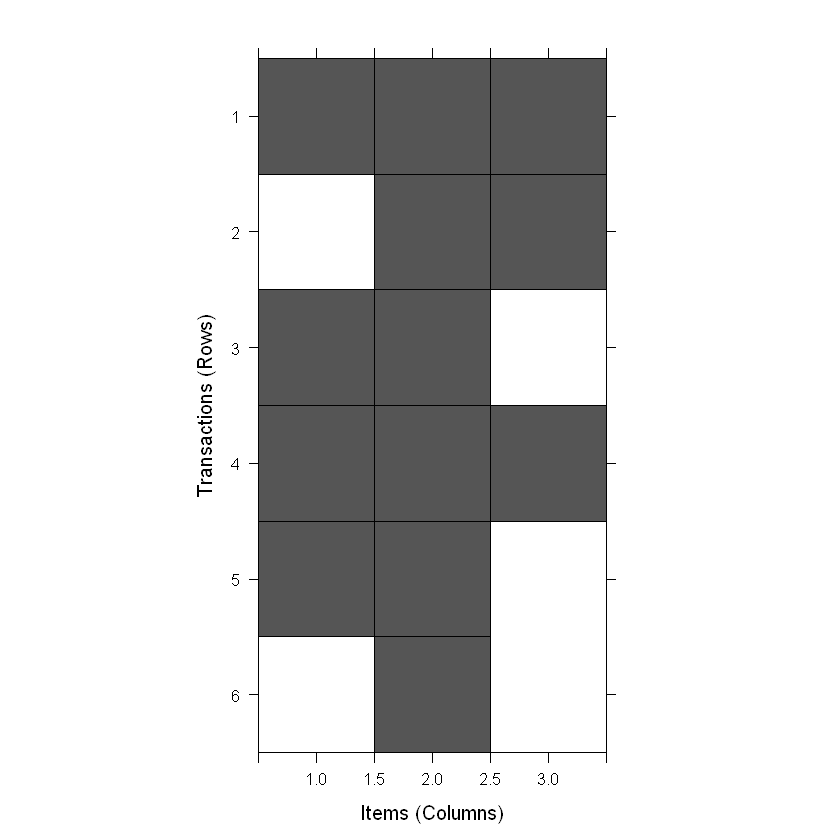

In [5]:
image(transacoes)

In [22]:
#chamada da função apriori para associação de mineração
??apriori

In [21]:
regras = apriori(transacoes, parameter = list(supp=0.5,conf=0.5)) 

starting httpd help server ... done


Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.5    0.1    1 none FALSE            TRUE       5     0.5      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 3 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[4 item(s), 6 transaction(s)] done [0.00s].
sorting and recoding items ... [3 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 2 done [0.00s].
writing ... [7 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


In [7]:
regras

set of 7 rules 

In [8]:
inspect(regras)

    lhs          rhs       support   confidence lift
[1] {}        => {Sorvete} 0.5000000 0.5000000  1   
[2] {}        => {Cerveja} 0.6666667 0.6666667  1   
[3] {}        => {Pizza}   1.0000000 1.0000000  1   
[4] {Sorvete} => {Pizza}   0.5000000 1.0000000  1   
[5] {Pizza}   => {Sorvete} 0.5000000 0.5000000  1   
[6] {Cerveja} => {Pizza}   0.6666667 1.0000000  1   
[7] {Pizza}   => {Cerveja} 0.6666667 0.6666667  1   


In [9]:
install.packages("arulesViz")

Installing package into 'C:/Users/dmiyake/Documents/R/win-library/3.4'
(as 'lib' is unspecified)
also installing the dependencies 'modeltools', 'mclust', 'flexmix', 'prabclus', 'diptest', 'mvtnorm', 'trimcluster', 'gridExtra', 'fpc', 'viridis', 'gtools', 'gdata', 'TSP', 'qap', 'gclus', 'dendextend', 'gplots', 'registry', 'irlba', 'crosstalk', 'scatterplot3d', 'vcd', 'seriation', 'igraph', 'DT', 'plotly'



package 'modeltools' successfully unpacked and MD5 sums checked
package 'mclust' successfully unpacked and MD5 sums checked
package 'flexmix' successfully unpacked and MD5 sums checked
package 'prabclus' successfully unpacked and MD5 sums checked
package 'diptest' successfully unpacked and MD5 sums checked
package 'mvtnorm' successfully unpacked and MD5 sums checked
package 'trimcluster' successfully unpacked and MD5 sums checked
package 'gridExtra' successfully unpacked and MD5 sums checked
package 'fpc' successfully unpacked and MD5 sums checked
package 'viridis' successfully unpacked and MD5 sums checked
package 'gtools' successfully unpacked and MD5 sums checked
package 'gdata' successfully unpacked and MD5 sums checked
package 'TSP' successfully unpacked and MD5 sums checked
package 'qap' successfully unpacked and MD5 sums checked
package 'gclus' successfully unpacked and MD5 sums checked
package 'dendextend' successfully unpacked and MD5 sums checked
package 'gplots' successfully

In [12]:
library("arulesViz")

Loading required package: grid


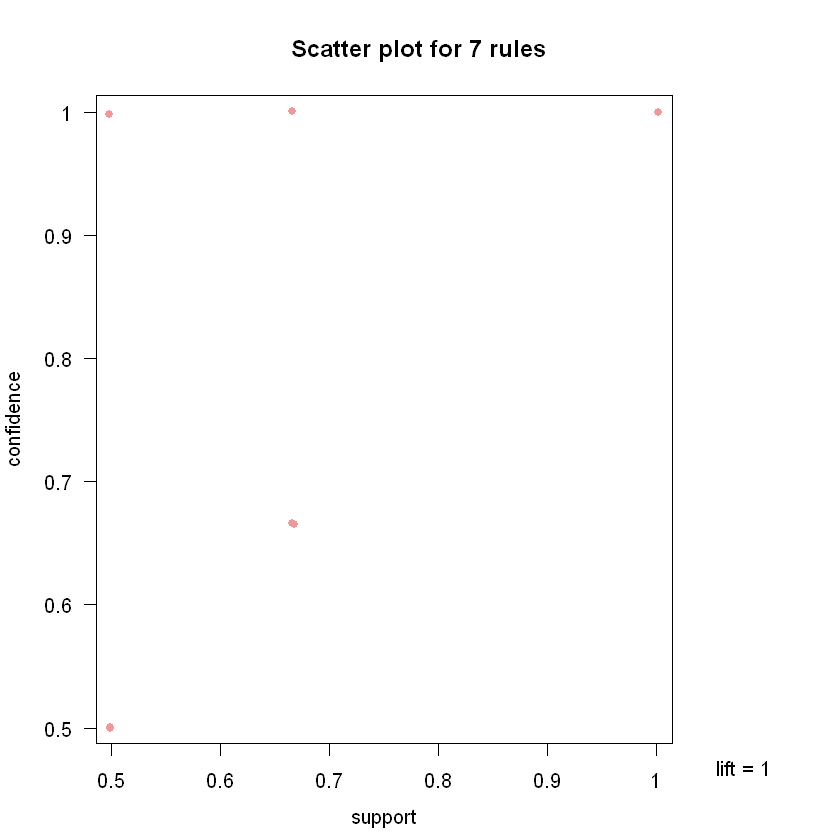

In [13]:
plot(regras)

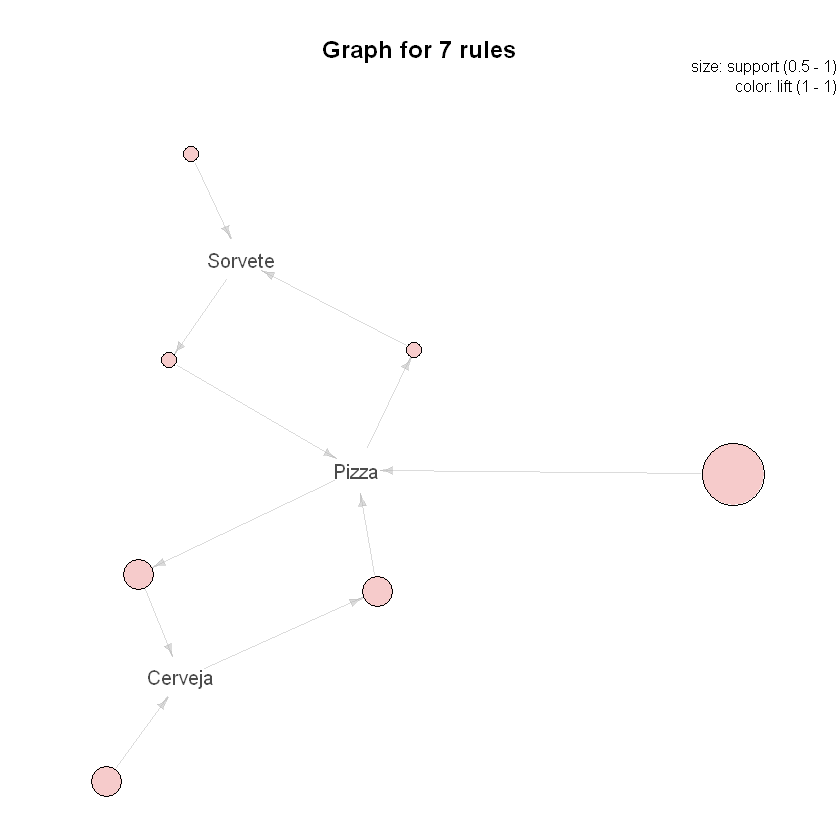

In [14]:
plot(regras, method="graph", control=list(type="items"))

### Associação com eclat

In [ ]:
#library(arules)

In [15]:
transacoes = read.transactions(file.choose(), format = "basket", sep=",") #leitura da transação, arquivo transactions2.txt

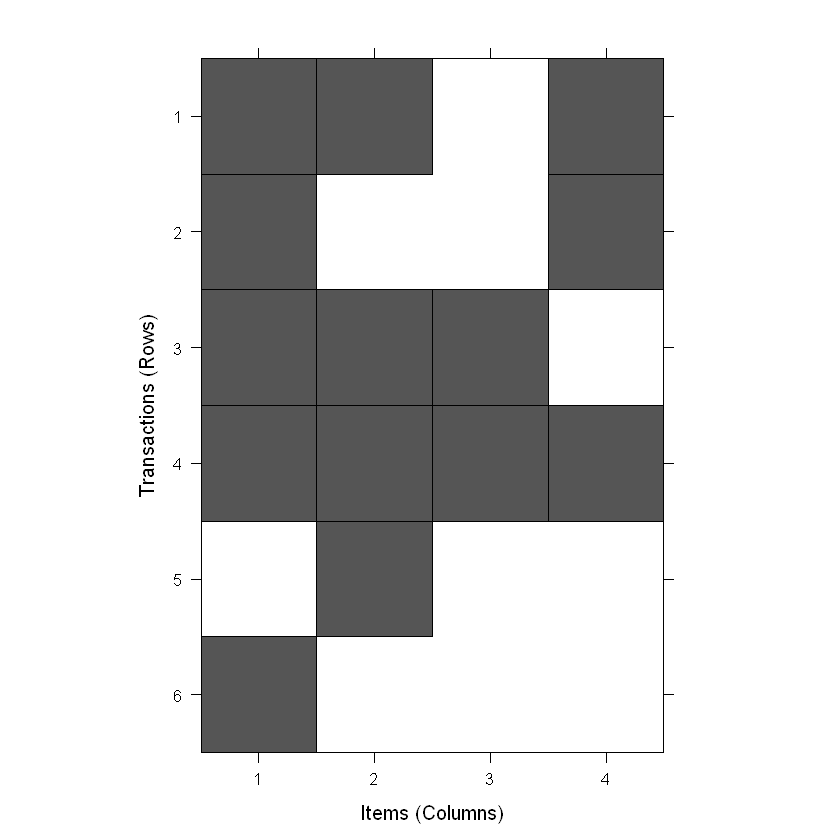

In [16]:
image(transacoes) #imagem da transação

In [18]:
regras = eclat(transacoes, parameter = list(supp = 0.1, maxlen = 15)) # 

Eclat

parameter specification:
 tidLists support minlen maxlen            target   ext
    FALSE     0.1      1     15 frequent itemsets FALSE

algorithmic control:
 sparse sort verbose
      7   -2    TRUE

Absolute minimum support count: 0 



Warning message in eclat(transacoes, parameter = list(supp = 0.1, maxlen = 15)):
"You chose a very low absolute support count of 0. You might run out of memory! Increase minimum support.
"

create itemset ... 
set transactions ...[4 item(s), 6 transaction(s)] done [0.00s].
sorting and recoding items ... [4 item(s)] done [0.00s].
creating bit matrix ... [4 row(s), 6 column(s)] done [0.00s].
writing  ... [15 set(s)] done [0.00s].
Creating S4 object  ... done [0.00s].


In [19]:
inspect(regras) #inspeção da variável

     items                         support  
[1]  {Carvão,Cerveja,Maionese,Pão} 0.1666667
[2]  {Carvão,Maionese,Pão}         0.1666667
[3]  {Cerveja,Maionese,Pão}        0.1666667
[4]  {Carvão,Cerveja,Maionese}     0.3333333
[5]  {Carvão,Maionese}             0.3333333
[6]  {Cerveja,Maionese}            0.3333333
[7]  {Maionese,Pão}                0.1666667
[8]  {Carvão,Cerveja,Pão}          0.3333333
[9]  {Carvão,Pão}                  0.5000000
[10] {Cerveja,Pão}                 0.3333333
[11] {Carvão,Cerveja}              0.5000000
[12] {Carvão}                      0.8333333
[13] {Cerveja}                     0.6666667
[14] {Pão}                         0.5000000
[15] {Maionese}                    0.3333333


In [ ]:
#library(arulesViz)

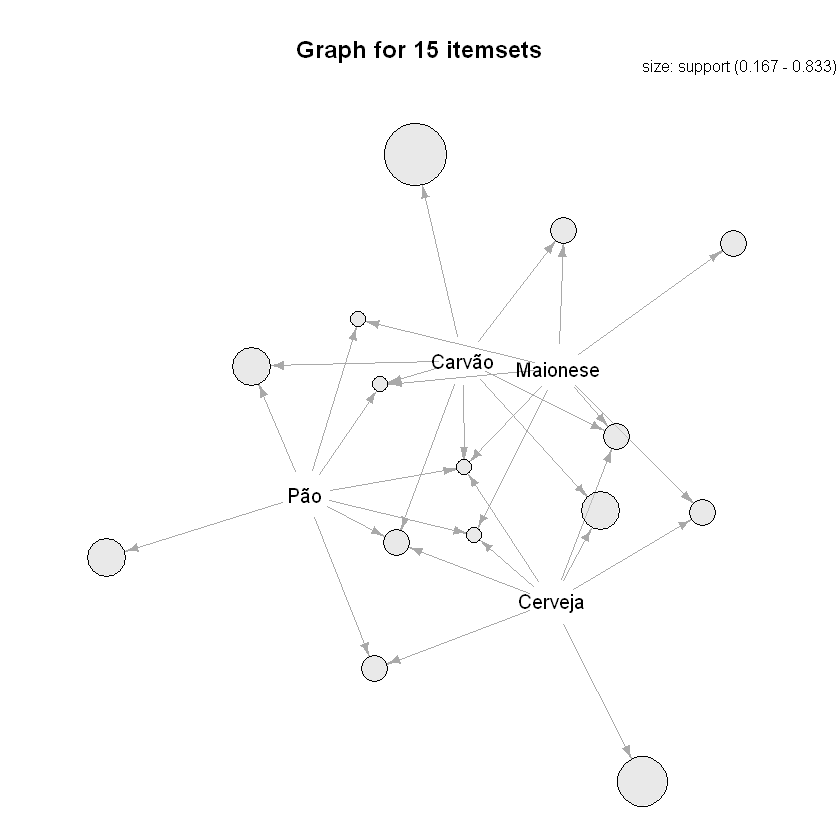

In [20]:
plot(regras, method = "graph", control = list(type = "items")) #plotagem das regras de associação

## FIM